<a href="https://colab.research.google.com/github/marcelo7bastos/mba_mcdia_est_desc_analise_pronaf/blob/main/mba_mcdia_est_desc_analise_pronaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Final - Estatística Descritiva**


## **O acesso ao crédito do PRONAF resultou em melhoria nas condições econômicas dos agricultores familiares ao longo de 10 anos?**

O **PRONAF** (Programa Nacional de Fortalecimento da Agricultura Familiar) é um dos principais instrumentos de política pública para apoiar pequenos produtores no Brasil. Desde sua implementação, ele visa garantir acesso ao crédito, fomentar o crescimento e reduzir a vulnerabilidade econômica dos agricultores familiares.

# 1. Preparação do Ambiente e Dados

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import warnings
import matplotlib.image as mpimg


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define o caminho da pasta onde os arquivos serão armazenados/recuperados
drive_folder = '/content/drive/MyDrive/ENAP_MBA_MCDIA/005_estatistica/trabalho_final/data'

# Parâmetros da análise
MODO_ANALISE = "amostra"  # Opções: "amostra", "nova_amostra", "populacao"
FRAC_AMOSTRA = 0.1  # 10% da base para amostragem

# Estrutura de decisão para carregar os dados
if MODO_ANALISE == "amostra":
    print("🔹 Carregando apenas uma amostra do dataset...")
    # Caminho para o arquivo de amostra já salvo no Google Drive
    arquivo_parquet = f"{drive_folder}/pronaf_amostra.parquet"
    df = pd.read_parquet(arquivo_parquet)

elif MODO_ANALISE == "populacao":
    print("🔹 Carregando a população completa (isso pode demorar)...")
    arquivo_parquet = f"{drive_folder}/pronaf.parquet"
    # Carrega o arquivo
    df = pd.read_parquet(arquivo_parquet)

else:
    raise ValueError("Modo de análise inválido! Escolha entre: 'amostra', 'nova_amostra' ou 'populacao'.")

# Exibir informações do dataset carregado
print(f"Número total de registros carregados: {df.shape[0]:,}".replace(",", "."))



🔹 Carregando apenas uma amostra do dataset...
Número total de registros carregados: 2.574.808


In [4]:
# Dicionário com as conversões recomendadas para cada variável
conversoes = {
    'REF_BACEN': 'str',  # Código identificador, manter como string
    'NU_ORDEM': 'str',  # Número de ordem, mas é um identificador também, manter string
    #'CNPJ_IF': 'str',  # Identificador de instituição financeira
    'DT_EMISSAO': 'datetime64[ns]',  # Data de emissão do contrato
    #'DT_VENCIMENTO': 'datetime64[ns]',  # Data de vencimento do contrato
    'CD_INST_CREDITO': 'str',  # Código da instituição financeira, manter string
    #'CD_CATEG_EMITENTE': 'str',  # Categoria do emitente
    'CD_FONTE_RECURSO': 'str',  # Código da fonte de recurso, manter string
    #'CNPJ_AGENTE_INVEST': 'str',  # Identificador do agente investidor
    'CD_ESTADO': 'str',  # Código de estado (UF), manter string
    #'CD_REF_BACEN_INVESTIMENTO': 'str',  # Código de referência Bacen para investimento
    #'CD_TIPO_SEGURO': 'str',  # Código do tipo de seguro
    #'CD_EMPREENDIMENTO': 'str',  # Código do empreendimento
    'CD_PROGRAMA': 'str',  # Código do programa de crédito
    #'CD_TIPO_ENCARG_FINANC': 'str',  # Tipo de encargo financeiro
    #'CD_TIPO_IRRIGACAO': 'str',  # Tipo de irrigação utilizada
    #'CD_TIPO_AGRICULTURA': 'str',  # Tipo de agricultura praticada
    'CD_FASE_CICLO_PRODUCAO': 'str',  # Fase do ciclo de produção, manter string
    #'CD_TIPO_CULTIVO': 'str',  # Tipo de cultivo agrícola
    #'CD_TIPO_INTGR_CONSOR': 'str',  # Tipo de integração consorciada
    #'CD_TIPO_GRAO_SEMENTE': 'str',  # Tipo de grão/semente plantado
    #'VL_ALIQ_PROAGRO': 'float64',  # Percentual de alíquota Proagro
    'VL_JUROS': 'float64',  # Taxa de juros, valor decimal
    #'VL_PRESTACAO_INVESTIMENTO': 'float64',  # Valor da prestação de investimento
    #'VL_PREV_PROD': 'float64',  # Valor previsto da produção
    #'VL_QUANTIDADE': 'float64',  # Quantidade financiada
    #'VL_RECEITA_BRUTA_ESPERADA': 'float64',  # Receita bruta esperada
    'VL_PARC_CREDITO': 'float64',  # Valor da parcela de crédito
    #'VL_REC_PROPRIO': 'float64',  # Receita própria do produtor
    #'VL_PERC_RISCO_STN': 'float64',  # Percentual de risco do STN
    #'VL_PERC_RISCO_FUNDO_CONST': 'float64',  # Percentual de risco do fundo
    #'VL_REC_PROPRIO_SRV': 'float64',  # Receita própria de serviço
    #'VL_AREA_FINANC': 'float64',  # Área financiada em hectares
    'CD_SUBPROGRAMA': 'str',  # Código do subprograma de financiamento
    #'VL_PRODUTIV_OBTIDA': 'float64',  # Produtividade obtida na lavoura
    #'DT_FIM_COLHEITA': 'datetime64[ns]',  # Data fim da colheita
    #'DT_FIM_PLANTIO': 'datetime64[ns]',  # Data fim do plantio
    #'DT_INIC_COLHEITA': 'datetime64[ns]',  # Data início da colheita
    #'DT_INIC_PLANTIO': 'datetime64[ns]',  # Data início do plantio
    #'VL_JUROS_ENC_FINAN_POSFIX': 'float64',  # Juros pós-fixados
    #'VL_PERC_CUSTO_EFET_TOTAL': 'float64',  # Percentual de custo efetivo total
    #'CD_CONTRATO_STN': 'str',  # Código do contrato STN
    #'CD_CNPJ_CADASTRANTE': 'str',  # CNPJ do cadastrante
    'VL_AREA_INFORMADA': 'float64',  # Área informada em hectares
    #'CD_CICLO_CULTIVAR': 'str',  # Ciclo da cultivar (curto, médio, longo)
    #'CD_TIPO_SOLO': 'str',  # Tipo de solo utilizado
    #'PC_BONUS_CAR': 'float64',  # Percentual de bônus CAR
    #'MES': 'Int64',  # Número do mês
    #'SEMESTRE': 'Int64',  # Número do semestre
    'ANO': 'Int64',  # Ano do financiamento
    #'SAFRA': 'str',  # Safra agrícola
    #'PROGRAMA_DESCRICAO': 'str',  # Descrição do programa
    #'CD_IBGE_MUNICIPIO': 'str',  # Código IBGE do município
    'CD_CPF_CNPJ': 'str',  # CPF/CNPJ do tomador de crédito
    'SEXO_BIOLOGICO': 'category'  # Masculino ou Feminino
    #'CD_DAP': 'str', #'Código do DAP'
}

# Filtrar apenas as colunas de interesse
df = df[list(conversoes.keys())]

# Aplicar conversão ao DataFrame
df = df.astype(conversoes)

# Exibir tipos para conferir a conversão
print(df.dtypes)

REF_BACEN                         object
NU_ORDEM                          object
DT_EMISSAO                datetime64[ns]
CD_INST_CREDITO                   object
CD_FONTE_RECURSO                  object
CD_ESTADO                         object
CD_PROGRAMA                       object
CD_FASE_CICLO_PRODUCAO            object
VL_JUROS                         float64
VL_PARC_CREDITO                  float64
CD_SUBPROGRAMA                    object
VL_AREA_INFORMADA                float64
ANO                                Int64
CD_CPF_CNPJ                       object
SEXO_BIOLOGICO                  category
dtype: object


# 2. Análise Preliminar e Limpeza dos Dados

## Tratamento do Valor do Crédito

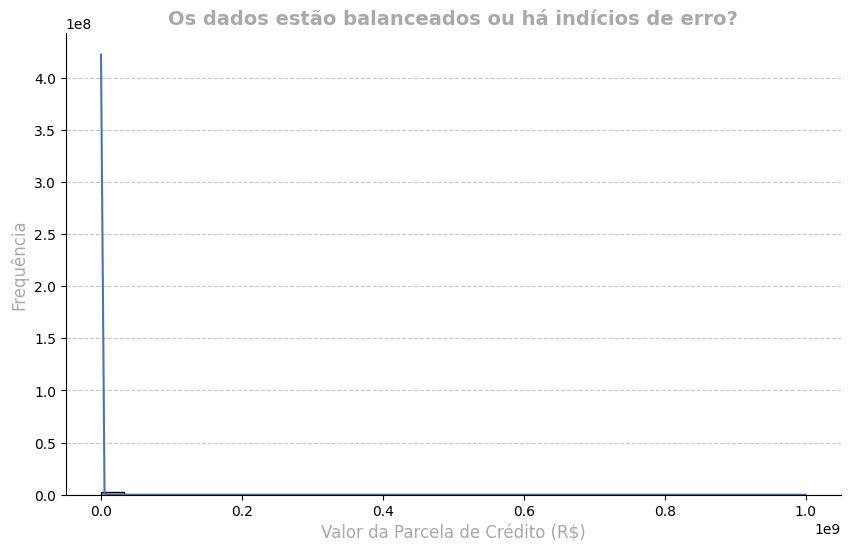

In [30]:
# Criar histograma
plt.figure(figsize=(10, 6))

# Criar histograma com bins ajustados e escala logarítmica se necessário
sns.histplot(df['VL_PARC_CREDITO'], bins=30, kde=True, color='#4C72B0')

# Ajustando o título com uma pergunta instigante
plt.title("Os dados estão balanceados ou há indícios de erro?", fontsize=14, color='darkgray', weight='bold')

# Ajustando rótulos dos eixos
plt.xlabel("Valor da Parcela de Crédito (R$)", fontsize=12, color='darkgray')
plt.ylabel("Frequência", fontsize=12, color='darkgray')

# Remover bordas desnecessárias
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Se os dados forem muito assimétricos, pode-se aplicar escala logarítmica no eixo X
#plt.xscale("log")  # Se necessário para melhor visualização dos dados

# Melhorar grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Salvar o gráfico com o nome desejado
plt.savefig(f"{drive_folder}/fig_2_tratamento_vl_credito.png", dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()


In [6]:
# Top 10 maiores valores de VL_PARC_CREDITO
df.nlargest(10, 'VL_PARC_CREDITO')

,REF_BACEN,NU_ORDEM,DT_EMISSAO,CD_INST_CREDITO,CD_FONTE_RECURSO,CD_ESTADO,CD_PROGRAMA,CD_FASE_CICLO_PRODUCAO,VL_JUROS,VL_PARC_CREDITO,CD_SUBPROGRAMA,VL_AREA_INFORMADA,ANO,CD_CPF_CNPJ,SEXO_BIOLOGICO
22426591,516432167,1,2023-08-21,5,0430,MT,0999,00,11.37,1.000000e+09,None,0.0,2023,None,NaN
11410484,506096200,1,2017-12-29,8,0303,SC,0999,00,6.60,5.000000e+08,None,0.0,2017,None,NaN
22257137,516273490,1,2023-08-02,5,0430,PR,0999,00,10.87,4.000000e+08,None,NaN,2023,None,NaN
22171896,516195120,1,2023-07-25,1,0430,MT,0999,00,10.60,4.000000e+08,None,0.0,2023,None,NaN
21619501,515650237,1,2023-04-06,5,0430,GO,0999,00,1.10,2.500000e+08,None,NaN,2023,None,NaN
19558213,513632673,1,2022-03-25,4,0430,PR,0999,00,12.99,2.400000e+08,None,NaN,2022,None,NaN
14056912,508479703,1,2019-06-10,1,0201,PR,0999,00,6.50,2.000000e+08,None,NaN,2019,None,NaN
23719370,517564564,1,2024-03-12,4,0201,GO,0999,00,9.50,2.000000e+08,None,NaN,2024,None,NaN
24324588,518106713,1,2024-06-17,1,0430,PR,0999,00,12.63,2.000000e+08,None,0.0,2024,None,NaN
20251318,514331235,1,2022-08-01,5,0430,PR,0999,00,14.73,2.000000e+08,None,NaN,2022,None,NaN


In [7]:
# Os 10 menores valores de VL_PARC_CREDITO
df.nsmallest(10, 'VL_PARC_CREDITO')

,REF_BACEN,NU_ORDEM,DT_EMISSAO,CD_INST_CREDITO,CD_FONTE_RECURSO,CD_ESTADO,CD_PROGRAMA,CD_FASE_CICLO_PRODUCAO,VL_JUROS,VL_PARC_CREDITO,CD_SUBPROGRAMA,VL_AREA_INFORMADA,ANO,CD_CPF_CNPJ,SEXO_BIOLOGICO
3365895,3255093,2,2014-04-24,1,0502,AL,0999,00,7.65,0.0,None,1.00,2014,34275533453,Masculino
3469577,3353731,2,2014-05-12,1,0301,PR,0999,22,5.50,0.0,None,1.38,2014,00470204907,Masculino
309503,239951,2,2013-02-21,1,0201,PR,0050,22,5.00,0.0,None,4.92,2013,11918730997,Masculino
2082971,2002014,2,2013-10-07,2,0502,BA,0999,00,7.00,0.0,None,17.00,2013,24392332934,Masculino
7433588,7022475,1,2015-11-19,5,0502,SE,0999,00,7.65,0.0,None,0.00,2015,19862768568,Masculino
1305881,1171752,1,2013-07-17,1,0502,MG,0999,00,7.00,0.0,None,180.00,2013,02390057675,Masculino
4916855,4740905,2,2014-10-30,5,0505,RS,0001,00,2.00,0.0,None,0.00,2014,91434670082,Feminino
3629635,3509454,3,2014-06-03,3,0201,PR,0999,22,5.50,0.0,None,5.93,2014,03910632947,Masculino
2990295,2871065,4,2014-02-13,2,0502,MA,0999,00,8.00,0.0,None,0.00,2014,05482887391,Masculino
3689596,3566069,4,2014-06-12,2,0502,PI,0999,00,5.30,0.0,None,3.00,2014,90050460315,Feminino


## Remoção de dados incorretos e ouliers

In [8]:
# Remover os valores iguais a 0 reais
print(f"Quantidade de valores iguais a zero: {df['VL_PARC_CREDITO'].eq(0).sum()}")

df = df[df['VL_PARC_CREDITO'] > 0]

Quantidade de valores iguais a zero: 17


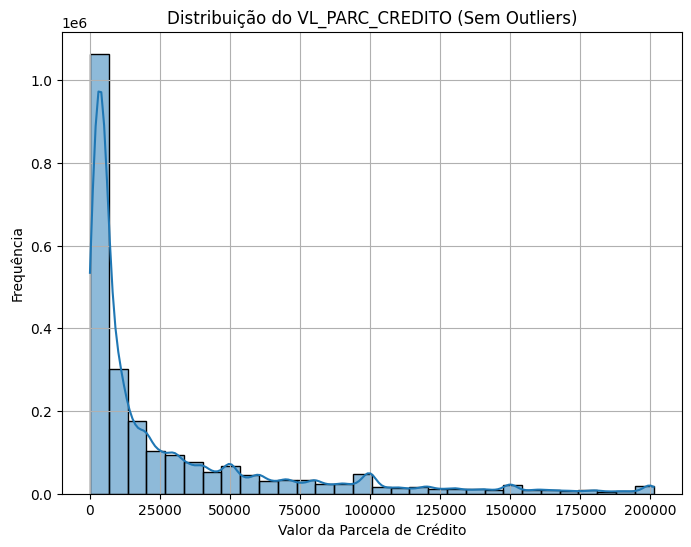

Número de registros originais: 2.574.791
Número de registros após remoção de outliers: 2.341.570
Outliers removidos: 233.221


In [31]:
# Auxiliar a identificar a distribuição paramétrica dos dados removendo outliers

# Calcular quartis e IQR (Intervalo Interquartil)
Q1 = np.percentile(df['VL_PARC_CREDITO'], 25)
Q3 = np.percentile(df['VL_PARC_CREDITO'], 75)
IQR = Q3 - Q1

# Definir limites para detecção de outliers
limite_inferior = Q1 - 3 * IQR
limite_superior = Q3 + 3 * IQR

# Filtrar dados dentro dos limites
df_tratado = df[(df['VL_PARC_CREDITO'] >= limite_inferior) &
                             (df['VL_PARC_CREDITO'] <= limite_superior)]

# Criar histograma após remoção dos outliers
plt.figure(figsize=(8, 6))
sns.histplot(df_tratado['VL_PARC_CREDITO'], bins=30, kde=True)  # kde=True para curva de densidade

# Personalizar o gráfico
plt.title("Distribuição do VL_PARC_CREDITO (Sem Outliers)")
plt.xlabel("Valor da Parcela de Crédito")
plt.ylabel("Frequência")
plt.grid(True)

# Salvar o gráfico com o nome desejado
plt.savefig(f"{drive_folder}/fig_21_limpeza_dados.png", dpi=300, bbox_inches='tight')

# Exibir gráfico
plt.show()

# Exibir quantidade de valores removidos formatados no padrão brasileiro
print(f"Número de registros originais: {df.shape[0]:,}".replace(",", "."))
print(f"Número de registros após remoção de outliers: {df_tratado.shape[0]:,}".replace(",", "."))
print(f"Outliers removidos: {df.shape[0] - df_tratado.shape[0]:,}".replace(",", "."))


## Garantindo os tipos corretos nas variáveis de interesse

In [10]:
df['VL_PARC_CREDITO'] = pd.to_numeric(df['VL_PARC_CREDITO'], errors='coerce')

# 3. Crédito Rural no Brasil


### Contexto

In [11]:
# Criar um novo DataFrame com os dados de Crédito Rural Contendo as colunas ANO, CD_CPF_CNPJ, CD_PROGRAMA, VL_PARC_CREDITO,
df_credito_rural = df[['ANO', 'CD_CPF_CNPJ', 'CD_PROGRAMA', 'VL_PARC_CREDITO']]
#df_credito_rural.dtypes

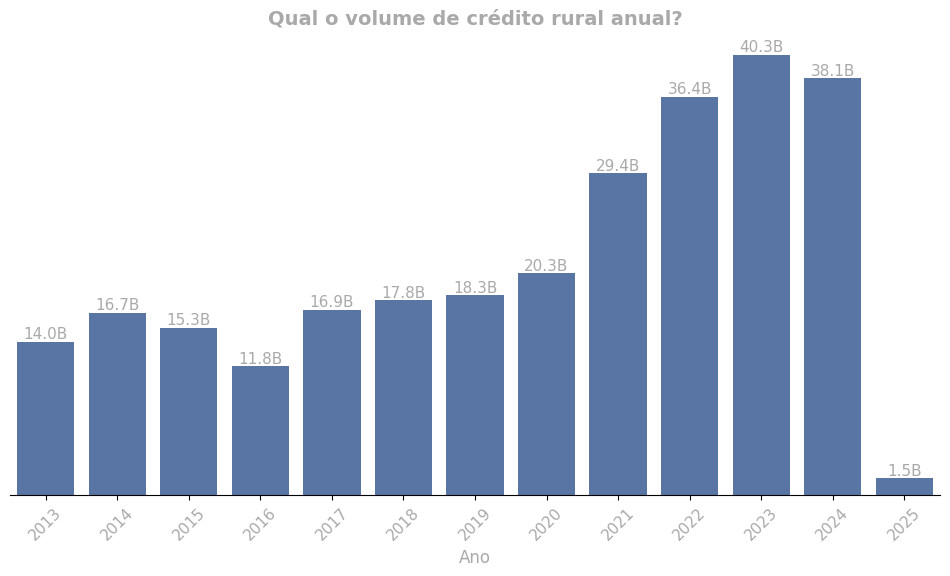

In [32]:
# Criar gráfico de barras com o valor total de crédito rural por ano
plt.figure(figsize=(12, 6))

# Criando o gráfico de barras
ax = sns.barplot(data=df_credito_rural, x='ANO', y='VL_PARC_CREDITO', estimator=sum, errorbar=None, color='#4C72B0')

# Ajustando o título e subtítulo
plt.title('Qual o volume de crédito rural anual?', fontsize=14, color='darkgray', weight='bold')

# Ajustando os rótulos dos eixos
plt.xlabel('Ano', fontsize=12, color='darkgray')
plt.ylabel(None)  # Remove o nome do eixo Y

# Removendo a barra do eixo Y
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticks([])  # Remove os valores numéricos do eixo Y

# Convertendo os valores para bilhões e adicionando rótulos no topo das barras
for p in ax.patches:
    height = p.get_height() / 1e9  # Convertendo para bilhões
    ax.annotate(f'{height:.1f}B',  # Formato com uma casa decimal
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11, color='darkgray')

# Ajustando os ticks do eixo X
plt.xticks(rotation=45, fontsize=11, color='darkgray')

# Salvar o gráfico com o nome desejado
plt.savefig(f"{drive_folder}/fig_3_credito_rural.png", dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()


## Crédito Rural para Agricultura Familiar

### Em valor monetário

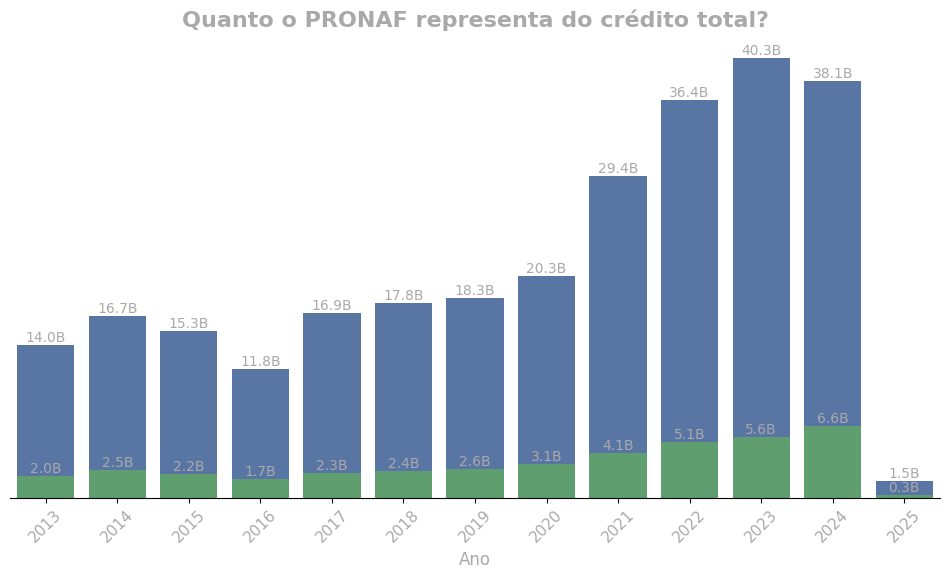

In [33]:
# Criar agregação do total de crédito por ano
credito_total = df_credito_rural.groupby('ANO')['VL_PARC_CREDITO'].sum().reset_index()
# Filtrar os dados para o programa específico (CD_PROGRAMA = '0001')
df_programa_0001 = df_credito_rural[df_credito_rural['CD_PROGRAMA'] == '0001']
credito_programa_0001 = df_programa_0001.groupby('ANO')['VL_PARC_CREDITO'].sum().reset_index()

# Criar gráfico
plt.figure(figsize=(12, 6))

# Criando barras para o crédito total
sns.barplot(data=credito_total, x='ANO', y='VL_PARC_CREDITO', color='#4C72B0', label='Crédito Total')

# Criando barras para o crédito do programa 0001
sns.barplot(data=credito_programa_0001, x='ANO', y='VL_PARC_CREDITO', color='#55A868', label='Crédito Programa 0001')

# Ajustando título
plt.title('Quanto o PRONAF representa do crédito total?', fontsize=16, color='darkgray', weight='bold')

# Ajustando rótulos dos eixos
plt.xlabel('Ano', fontsize=12, color='darkgray')
plt.ylabel(None)  # Remove nome do eixo Y

# Removendo a barra e os números do eixo Y
ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticks([])

# Adicionando valores no topo das barras (convertendo para bilhões)
for p in ax.patches:
    height = p.get_height() / 1e9  # Convertendo para bilhões
    if height > 0:  # Evitar anotações em valores zerados
        ax.annotate(f'{height:.1f}B',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='darkgray')

# **Remover a legenda padrão do Seaborn**
plt.legend().remove()

# Ajustando rótulos do eixo X
plt.xticks(rotation=45, fontsize=11, color='darkgray')

# Salvar o gráfico com o nome desejado
plt.savefig(f"{drive_folder}/fig_31_credito_rural_pronaf.png", dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [36]:
# Calcular o percentual do crédito do Programa 0001 em relação ao total
credito_total['percentual_programa_0001'] = (credito_programa_0001['VL_PARC_CREDITO'] / credito_total['VL_PARC_CREDITO']) * 100


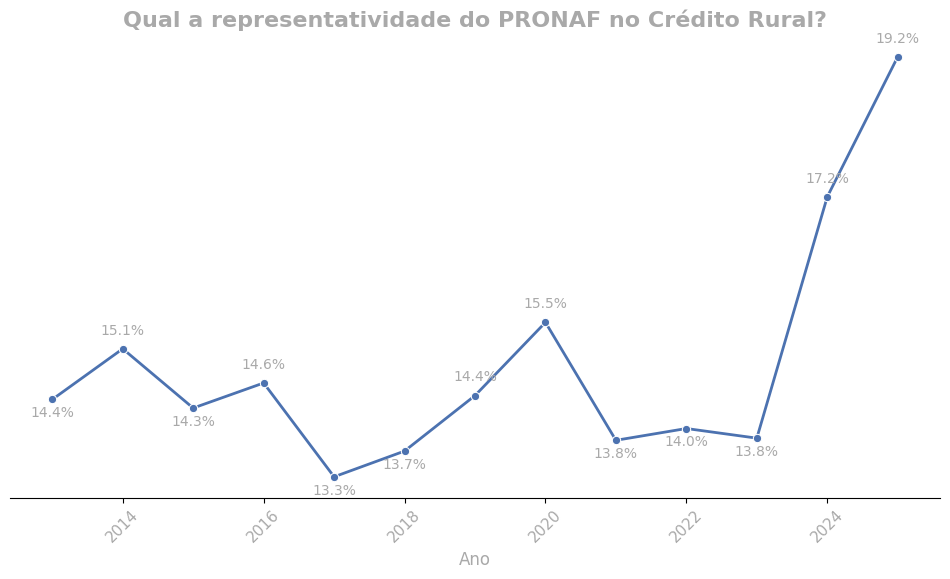

In [37]:
# Criar figura
plt.figure(figsize=(12, 6))

# Criando gráfico de linha
ax = sns.lineplot(data=credito_total, x='ANO', y='percentual_programa_0001', marker='o', color='#4C72B0', linewidth=2)

# Ajustando título
plt.title('Qual a representatividade do PRONAF no Crédito Rural?', fontsize=16, color='darkgray', weight='bold')

# Ajustando rótulos dos eixos
plt.xlabel('Ano', fontsize=12, color='darkgray')
plt.ylabel(None)  # Remove nome do eixo Y

# Removendo a barra e os números do eixo Y
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticks([])

# Adicionando valores no topo dos pontos
for x, y in zip(credito_total['ANO'], credito_total['percentual_programa_0001']):
    offset = 0.2 if y > credito_total['percentual_programa_0001'].median() else -0.25  # Ajusta dinamicamente
    plt.text(x, y + offset, f'{y:.1f}%', ha='center', fontsize=10, color='darkgray')


# Ajustando rótulos do eixo X
plt.xticks(rotation=45, fontsize=11, color='darkgray')

# Salvar o gráfico com o nome desejado
plt.savefig(f"{drive_folder}/fig_32_credito_rural_pronaf_percentual.png", dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()


### Em quantidade de beneficiários

In [38]:
# Preparando o datafame para Contagem de operações por CPF/CNPF

# Filtrar os dados para o programa específico (CD_PROGRAMA = '0001')
df_programa_0001_contagem_cpf = df_credito_rural[df_credito_rural['CD_PROGRAMA'] == '0001']

# Agrupar contando valores de CD_CPF_CNPJ únicos por ano
contagem_cpf_pnpf_total = df_credito_rural.groupby('ANO')['CD_CPF_CNPJ'].nunique().reset_index()
contagem_cpf_pnpf_0001 = df_programa_0001.groupby('ANO')['CD_CPF_CNPJ'].nunique().reset_index()

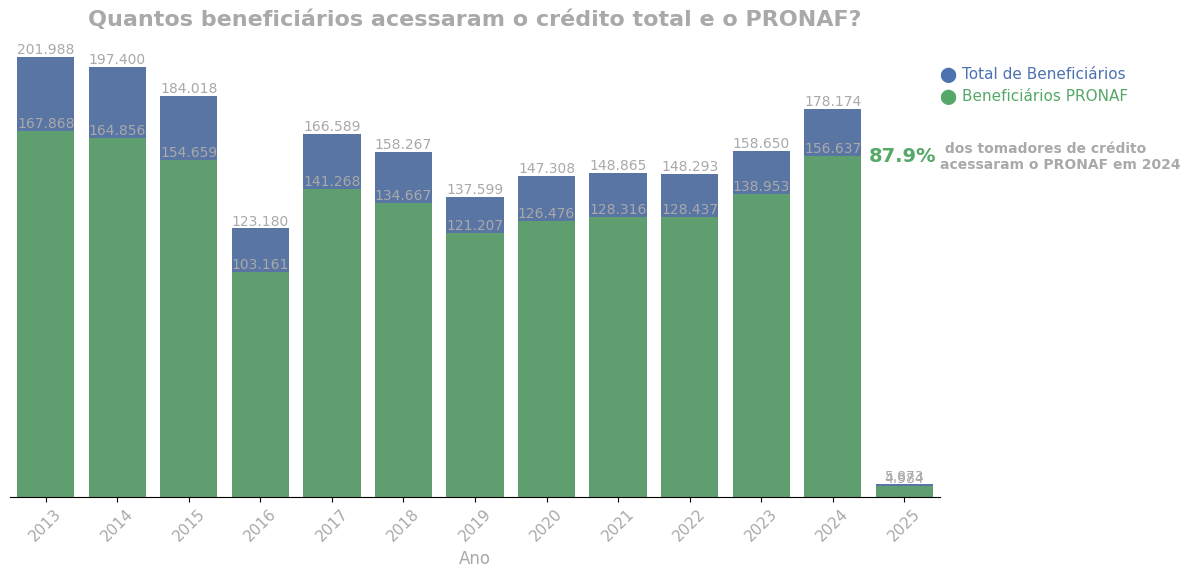

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar figura
plt.figure(figsize=(12, 6))

# Criando barras para o total de CPFs/CNPJs únicos
sns.barplot(data=contagem_cpf_pnpf_total, x='ANO', y='CD_CPF_CNPJ', color='#4C72B0', label='Total de Beneficiários')

# Criando barras para CPFs/CNPJs do Programa 0001
sns.barplot(data=contagem_cpf_pnpf_0001, x='ANO', y='CD_CPF_CNPJ', color='#55A868', label='Beneficiários PRONAF')

# Ajustando título
plt.title('Quantos beneficiários acessaram o crédito total e o PRONAF?', fontsize=16, color='darkgray', weight='bold')

# Ajustando rótulos dos eixos
plt.xlabel('Ano', fontsize=12, color='darkgray')
plt.ylabel(None)  # Remove nome do eixo Y para foco na visualização

# Removendo a barra e os números do eixo Y
ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticks([])

# Adicionando valores absolutos no topo das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Evitar anotações em valores zerados
        ax.annotate(f'{int(height):,}'.replace(',', '.'),  # Formato padrão brasileiro
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='darkgray')

#### Destacar o percentual de participação apenas em 2024
percent_2024 = (contagem_cpf_pnpf_0001[contagem_cpf_pnpf_0001['ANO'] == 2024]['CD_CPF_CNPJ'].values[0] /
                contagem_cpf_pnpf_total[contagem_cpf_pnpf_total['ANO'] == 2024]['CD_CPF_CNPJ'].values[0]) * 100

# Definir a posição base
x_pos = len(contagem_cpf_pnpf_total) - 1.5
y_pos = contagem_cpf_pnpf_total['CD_CPF_CNPJ'].max() * 0.76

# Criar a anotação do número em verde
plt.annotate(f"{percent_2024:.1f}%", (x_pos, y_pos), fontsize=14, color='#55A868', weight='bold')

# Criar a anotação do restante do texto logo ao lado
plt.annotate(" dos tomadores de crédito\nacessaram o PRONAF em 2024",
             (x_pos + 1, y_pos * 0.98), fontsize=10, color='darkgray', weight='bold', ha='left')
####

# Criar legenda moderna usando textos embutidos no gráfico
plt.text(len(contagem_cpf_pnpf_total) - 0.5, contagem_cpf_pnpf_total['CD_CPF_CNPJ'].max() * 0.95,
         "⬤ Total de Beneficiários", fontsize=11, color='#4C72B0')
plt.text(len(contagem_cpf_pnpf_total) - 0.5, contagem_cpf_pnpf_total['CD_CPF_CNPJ'].max() * 0.90,
         "⬤ Beneficiários PRONAF", fontsize=11, color='#55A868')

# **Remover a legenda padrão do Seaborn**
plt.legend().remove()

# Ajustando rótulos do eixo X
plt.xticks(rotation=45, fontsize=11, color='darkgray')

# Salvar o gráfico com o nome desejado
plt.savefig(f"{drive_folder}/fig_33_qtde_beneficiarios.png", dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()


## Explorando mais o PRONAF...

In [18]:
# Criar novo dataframe com dados do PRONAF (CD_PROGRAMA = '0001')
df_pronaf = df[df['CD_PROGRAMA'] == '0001']

# Filtrar por subprogramas que existiam em 2024
# Passo 1: Criar a lista de subprogramas que ocorreram em 2024
subprogramas_2024 = df_pronaf[df_pronaf['ANO'] == 2024]['CD_SUBPROGRAMA'].unique().tolist()

# Passo 2: Filtrar o dataframe completo para conter apenas esses subprogramas
df_pronaf_filtrado = df_pronaf[df_pronaf['CD_SUBPROGRAMA'].isin(subprogramas_2024)]

#df_pronaf_filtrado

### Créditos por Subprograma

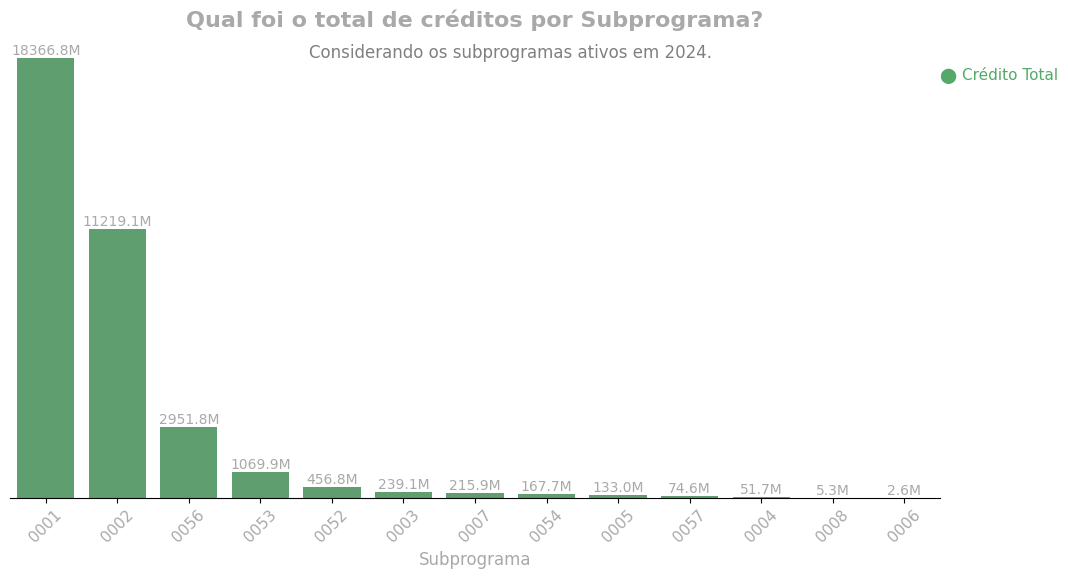

In [40]:
# Criar dataframe com a soma total de crédito por subprograma e ordenar de forma decrescente
df_subprograma_credito = df_pronaf_filtrado.groupby("CD_SUBPROGRAMA")["VL_PARC_CREDITO"].sum().reset_index()
df_subprograma_credito = df_subprograma_credito.sort_values(by="VL_PARC_CREDITO", ascending=False)

# Converter valores para milhões
df_subprograma_credito["VL_PARC_CREDITO"] = df_subprograma_credito["VL_PARC_CREDITO"] / 1e6  # Convertendo para milhões

# Criar figura
plt.figure(figsize=(12, 6))

# Criando barras para o crédito total por subprograma (agora ordenado)
ax = sns.barplot(data=df_subprograma_credito, x="CD_SUBPROGRAMA", y="VL_PARC_CREDITO", color='#55A868')

# Ajustando título e subtítulo
plt.title('Qual foi o total de créditos por Subprograma?', fontsize=16, color='darkgray', weight='bold')
plt.text(x=len(df_subprograma_credito) / 2,
         y=df_subprograma_credito["VL_PARC_CREDITO"].max() * 1.0,
         s="Considerando os subprogramas ativos em 2024.",
         fontsize=12, color='gray', ha='center')

# Ajustando rótulos dos eixos
plt.xlabel('Subprograma', fontsize=12, color='darkgray')
plt.ylabel(None)  # Remove nome do eixo Y

# Removendo a barra e os números do eixo Y
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticks([])

# Adicionando valores absolutos no topo das barras (em milhões)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}M',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='darkgray')

# Criar legenda moderna usando textos embutidos no gráfico
plt.text(len(df_subprograma_credito) - 0.5, df_subprograma_credito["VL_PARC_CREDITO"].max() * 0.95,
         "⬤ Crédito Total", fontsize=11, color='#55A868')

# **Remover a legenda padrão do Seaborn SOMENTE SE ELA EXISTIR**
if ax.get_legend() is not None:
    ax.get_legend().remove()

# Ajustando rótulos do eixo X para refletir a ordem decrescente
plt.xticks(rotation=45, fontsize=11, color='darkgray')

# Salvar o gráfico com o nome desejado
plt.savefig(f"{drive_folder}/fig_34_creditos_subprograma.png", dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()


### Há diferenças entre os subprogramas?

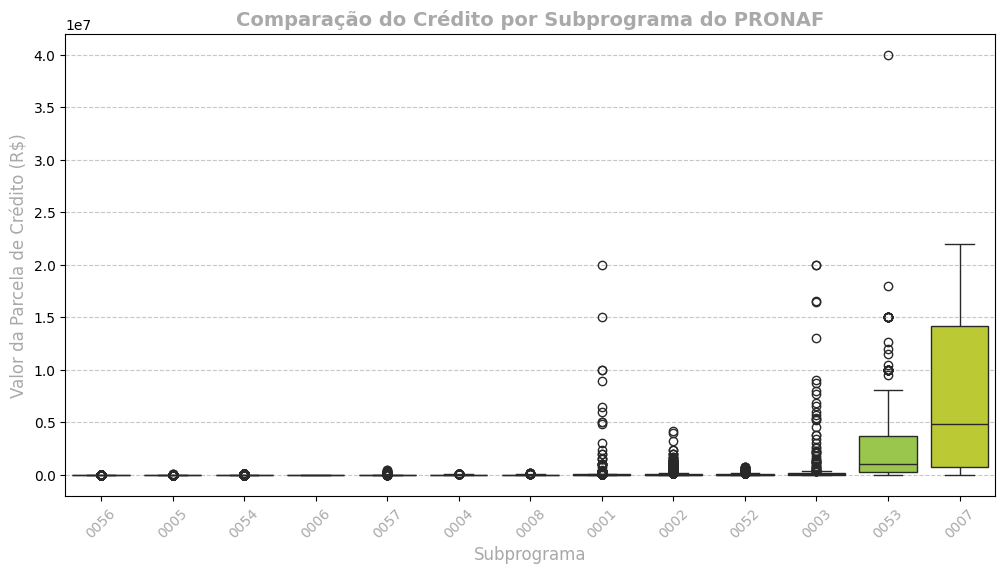

In [41]:
# Evitar warnings irrelevantes do Pandas e Matplotlib
warnings.simplefilter("ignore", UserWarning)

# Criar cópia do dataframe para evitar problemas de modificação
df_pronaf_filtrado = df_pronaf_filtrado.copy()

# Calcular a média do valor da parcela de crédito por subprograma e ordenar (com observed=False)
media_por_subprograma = df_pronaf_filtrado.groupby("CD_SUBPROGRAMA", observed=False)["VL_PARC_CREDITO"].mean().sort_values()

# Criar uma nova coluna de ordenação no dataframe
df_pronaf_filtrado["CD_SUBPROGRAMA"] = pd.Categorical(
    df_pronaf_filtrado["CD_SUBPROGRAMA"],
    categories=media_por_subprograma.index,  # Ordenando os subprogramas pela média do crédito
    ordered=True
)

# Criar gráfico de Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_pronaf_filtrado,
    x="CD_SUBPROGRAMA",
    y="VL_PARC_CREDITO",
    hue="CD_SUBPROGRAMA",
    palette="viridis",
    legend=False
)

# Ajustes do gráfico
plt.title("Comparação do Crédito por Subprograma do PRONAF", fontsize=14, color="darkgray", weight="bold", fontname="sans-serif")
plt.xlabel("Subprograma", fontsize=12, color="darkgray")
plt.ylabel("Valor da Parcela de Crédito (R$)", fontsize=12, color="darkgray")
plt.xticks(rotation=45, fontsize=10, color="darkgray")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Salvar o gráfico com o nome desejado
plt.savefig(f"{drive_folder}/fig_35_creditos_subprograma_boxplot.png", dpi=300, bbox_inches='tight')

# Exibir gráfico
plt.show()


# 4. Agricultor@s Familiares e o Crédito

## Há recorrência no acesso a crédito?

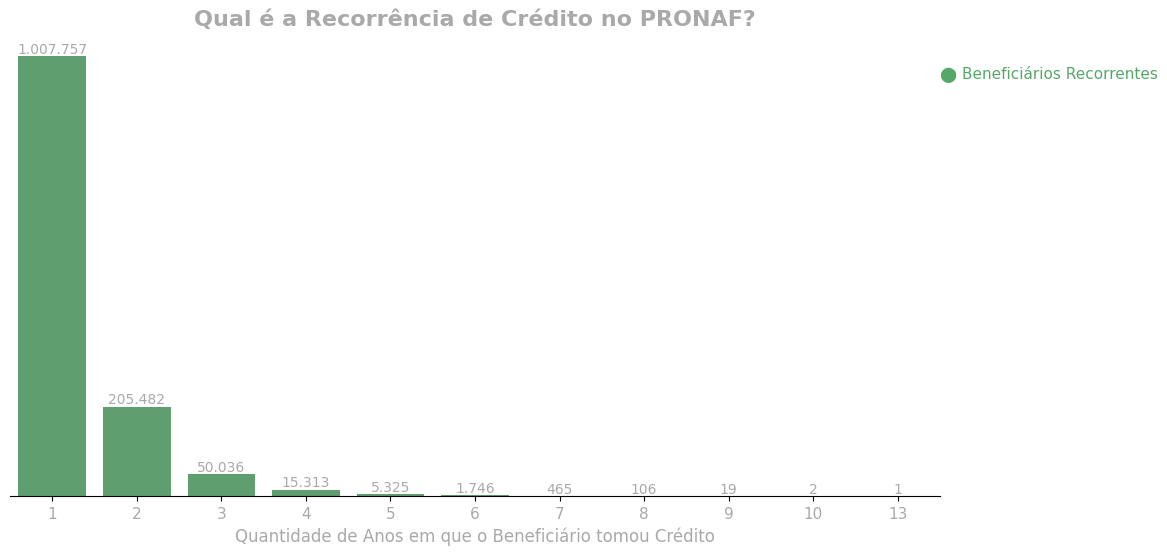

In [42]:
# Conta quantos anos distintos cada CPF apareceu no PRONAF.

# Filtrar apenas beneficiários do PRONAF
df_pronaf = df[df['CD_PROGRAMA'] == '0001']

# Contar em quantos anos diferentes cada CPF apareceu
df_recorrencia = df_pronaf.groupby('CD_CPF_CNPJ')['ANO'].nunique().reset_index()
df_recorrencia.columns = ['CD_CPF_CNPJ', 'Anos_Ativo']

# Contar quantos CPFs apareceram em cada quantidade de anos distintos
df_recorrencia_contagem = df_recorrencia['Anos_Ativo'].value_counts().reset_index()
df_recorrencia_contagem.columns = ['Anos_Ativo', 'Quantidade_CPFS']
df_recorrencia_contagem = df_recorrencia_contagem.sort_values(by='Anos_Ativo')

# Criar figura
plt.figure(figsize=(12, 6))

# Criando gráfico de barras
sns.barplot(data=df_recorrencia_contagem, x="Anos_Ativo", y="Quantidade_CPFS", color='#55A868')

# Ajustando título
plt.title('Qual é a Recorrência de Crédito no PRONAF?', fontsize=16, color='darkgray', weight='bold')

# Ajustando rótulos dos eixos
plt.xlabel('Quantidade de Anos em que o Beneficiário tomou Crédito', fontsize=12, color='darkgray')
plt.ylabel(None)  # Remove nome do eixo Y

# Removendo a barra e os números do eixo Y
ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticks([])

# Adicionando valores no topo das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Evitar anotações em valores zerados
        ax.annotate(f'{int(height):,}'.replace(',', '.'),  # Formato brasileiro de separação
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='darkgray')

# Criar legenda moderna usando textos embutidos no gráfico
plt.text(len(df_recorrencia_contagem) - 0.5, df_recorrencia_contagem["Quantidade_CPFS"].max() * 0.95,
         "⬤ Beneficiários Recorrentes", fontsize=11, color='#55A868')

# **Remover a legenda padrão do Seaborn**
plt.legend().remove()

# Ajustando rótulos do eixo X
plt.xticks(rotation=0, fontsize=11, color='darkgray')

# Salvar o gráfico com o nome desejado
plt.savefig(f"{drive_folder}/fig_4_recorrência.png", dpi=300, bbox_inches='tight')

# Exibir gráfico
plt.show()

## O valor médio do crédito por Agricultor(a) Familiar está subindo?

In [22]:
# Criar novo dataframe com dados do PRONAF (CD_PROGRAMA = '0001')
df_pronaf = df[df['CD_PROGRAMA'] == '0001']

# Somar o VL_PARCELA_CREDITO Agrupando por CPF/CNPJ e Ano
df_pronaf_soma = df_pronaf.groupby(['CD_CPF_CNPJ', 'ANO'])['VL_PARC_CREDITO'].sum().reset_index()

# remover valores iguas a 'None' em CD_CPF_CNPJ
df_pronaf_soma = df_pronaf_soma[df_pronaf_soma['CD_CPF_CNPJ'] != 'None']
#df_pronaf_soma

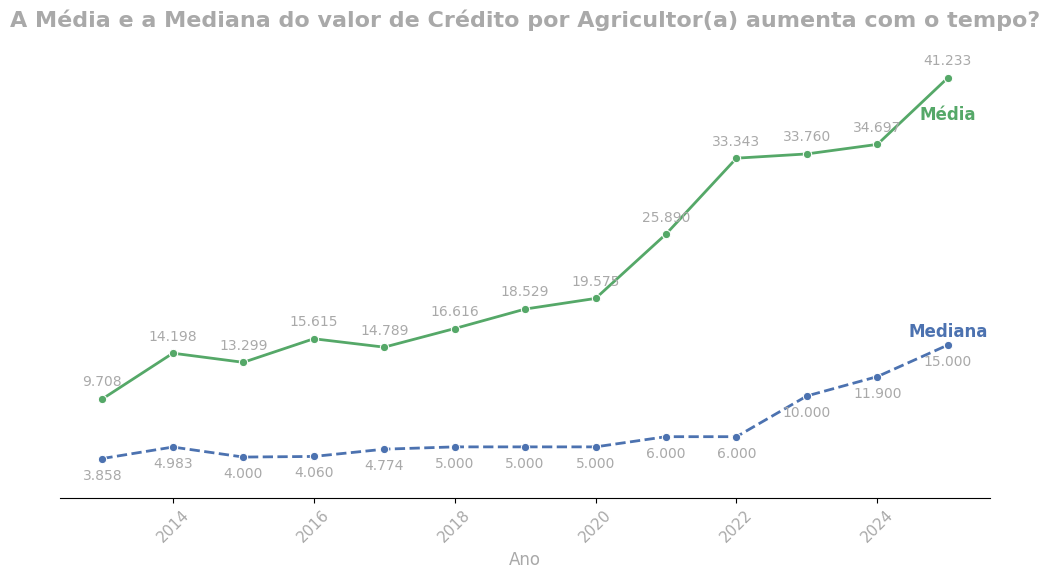

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular o valor médio e mediano do crédito por CPF/CNPJ em cada ano
df_pronaf_estatisticas = df_pronaf_soma.groupby("ANO")["VL_PARC_CREDITO"].agg(['mean', 'median']).reset_index()

# Criar figura
plt.figure(figsize=(12, 6))

# Criando o gráfico de linha para a média (Verde)
ax = sns.lineplot(data=df_pronaf_estatisticas, x="ANO", y="mean", marker="o", color="#55A868", linewidth=2)

# Criando o gráfico de linha para a mediana (Azul)
sns.lineplot(data=df_pronaf_estatisticas, x="ANO", y="median", marker="o", color="#4C72B0", linewidth=2, linestyle="dashed")

# Ajustando título e subtítulo
plt.title("A Média e a Mediana do valor de Crédito por Agricultor(a) aumenta com o tempo?", fontsize=16, color="darkgray", weight="bold")

# Ajustando rótulos dos eixos
plt.xlabel("Ano", fontsize=12, color="darkgray")
plt.ylabel(None)  # Remover nome do eixo Y para manter o padrão

# Definir limite inferior do eixo Y para começar em zero
plt.ylim(0, df_pronaf_estatisticas["mean"].max() * 1.1)

# Removendo a barra e os números do eixo Y para um layout mais limpo
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticks([])

# Adicionando valores no topo dos pontos (Média - Verde)
for x, y in zip(df_pronaf_estatisticas["ANO"], df_pronaf_estatisticas["mean"]):
    plt.text(x, y + (df_pronaf_estatisticas["mean"].max() * 0.03),  # Ajustando deslocamento vertical
             f'{y:,.0f}'.replace(',', '.'), ha='center', fontsize=10, color='darkgray')

# Adicionando valores no topo dos pontos (Mediana - Agora em cinza)
for x, y in zip(df_pronaf_estatisticas["ANO"], df_pronaf_estatisticas["median"]):
    plt.text(x, y - (df_pronaf_estatisticas["mean"].max() * 0.05),  # Ajustando deslocamento para evitar sobreposição
             f'{y:,.0f}'.replace(',', '.'), ha='center', fontsize=10, color='darkgray')

# **Destacar Média e Mediana no ano de 2025**
if 2025 in df_pronaf_estatisticas["ANO"].values:
    media_2025 = df_pronaf_estatisticas.loc[df_pronaf_estatisticas["ANO"] == 2025, "mean"].values[0]
    mediana_2025 = df_pronaf_estatisticas.loc[df_pronaf_estatisticas["ANO"] == 2025, "median"].values[0]

    # Legenda "Média" em verde, abaixo da curva
    plt.text(2025, media_2025 - (df_pronaf_estatisticas["mean"].max() * 0.1),
             "Média", fontsize=12, color="#55A868", ha="center", weight="bold")

    # Legenda "Mediana" em azul, acima da curva
    plt.text(2025, mediana_2025 + (df_pronaf_estatisticas["mean"].max() * 0.02),
             "Mediana", fontsize=12, color="#4C72B0", ha="center", weight="bold")

# Ajustando rótulos do eixo X
plt.xticks(rotation=45, fontsize=11, color='darkgray')

# Salvar o gráfico com o nome desejado
plt.savefig(f"{drive_folder}/fig_41_media_mediana.png", dpi=300, bbox_inches='tight')

# Exibir gráfico
plt.show()


### E se desconsiderássemos valores extremos?

In [24]:
# Criar cópia do dataframe original para preservar os dados brutos
df_limpo = df_pronaf_soma.copy()

# Lista para armazenar dados filtrados
df_filtrado = []

# Remover outliers ano a ano com base no intervalo interquartil (IQR)
for ano in df_limpo['ANO'].unique():
    df_ano = df_limpo[df_limpo['ANO'] == ano]

    Q1 = df_ano['VL_PARC_CREDITO'].quantile(0.25)  # Primeiro quartil
    Q3 = df_ano['VL_PARC_CREDITO'].quantile(0.75)  # Terceiro quartil
    IQR = Q3 - Q1  # Intervalo interquartil

    # Definir limites para detecção de outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar apenas os valores dentro dos limites
    df_filtrado.append(df_ano[(df_ano['VL_PARC_CREDITO'] >= limite_inferior) & (df_ano['VL_PARC_CREDITO'] <= limite_superior)])

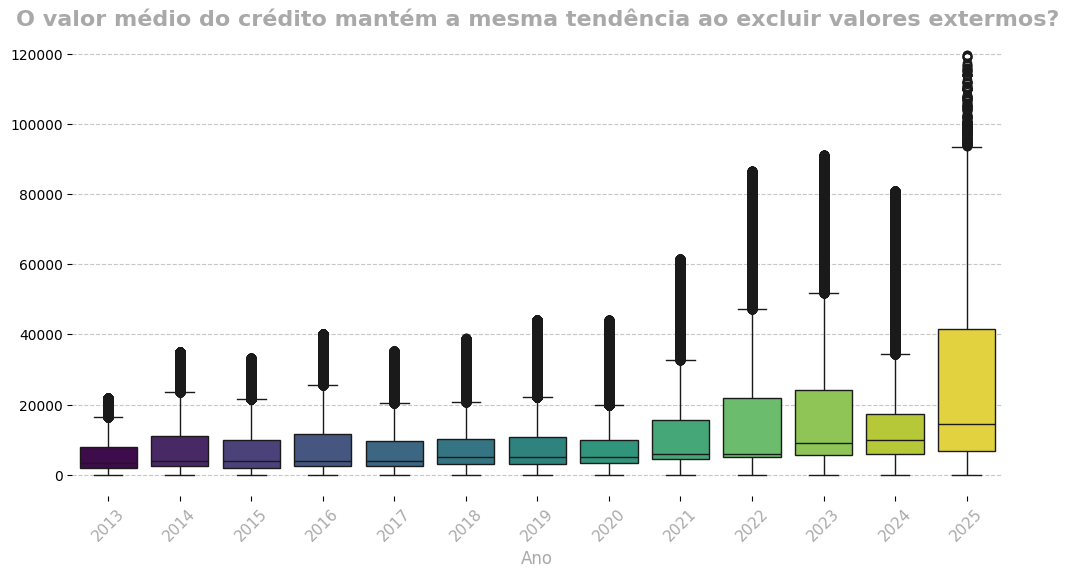

In [54]:
# Concatenar os dados filtrados
df_pronaf_filtrado = pd.concat(df_filtrado)

# Criar figura
plt.figure(figsize=(12, 6))

# Criando o boxplot sem warnings
ax = sns.boxplot(data=df_pronaf_filtrado, x="ANO", y="VL_PARC_CREDITO", hue="ANO", palette="viridis", legend=False)

# Ajustando título e subtítulo
plt.title("O valor médio do crédito mantém a mesma tendência ao excluir valores extermos?", fontsize=16, color="darkgray", weight="bold")

# Ajustando rótulos dos eixos
plt.xlabel("Ano", fontsize=12, color="darkgray")
plt.ylabel(None)  # Remover nome do eixo Y para manter o padrão visual

# Removendo a moldura do gráfico (barras externas)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Ajustando rótulos do eixo X
plt.xticks(rotation=45, fontsize=11, color="darkgray")

# Adicionando grid no eixo Y
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Salvar o gráfico com o nome desejado
plt.savefig(f"{drive_folder}/fig_42_valor_credito_boxplot.png", dpi=300, bbox_inches='tight')

# Exibir gráfico
plt.show()


# 5. Conlcusões e Limitações

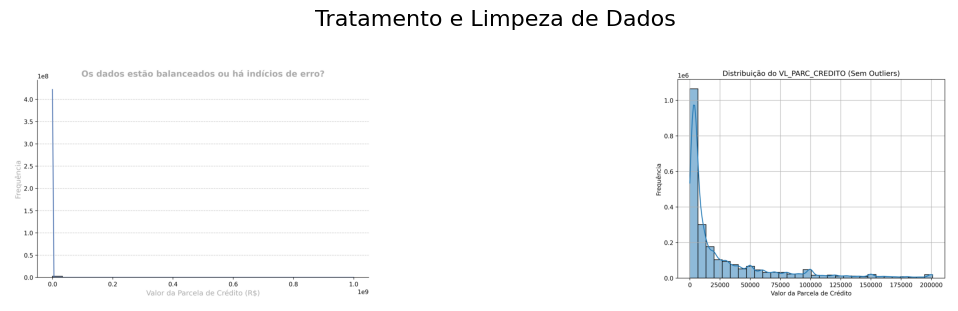

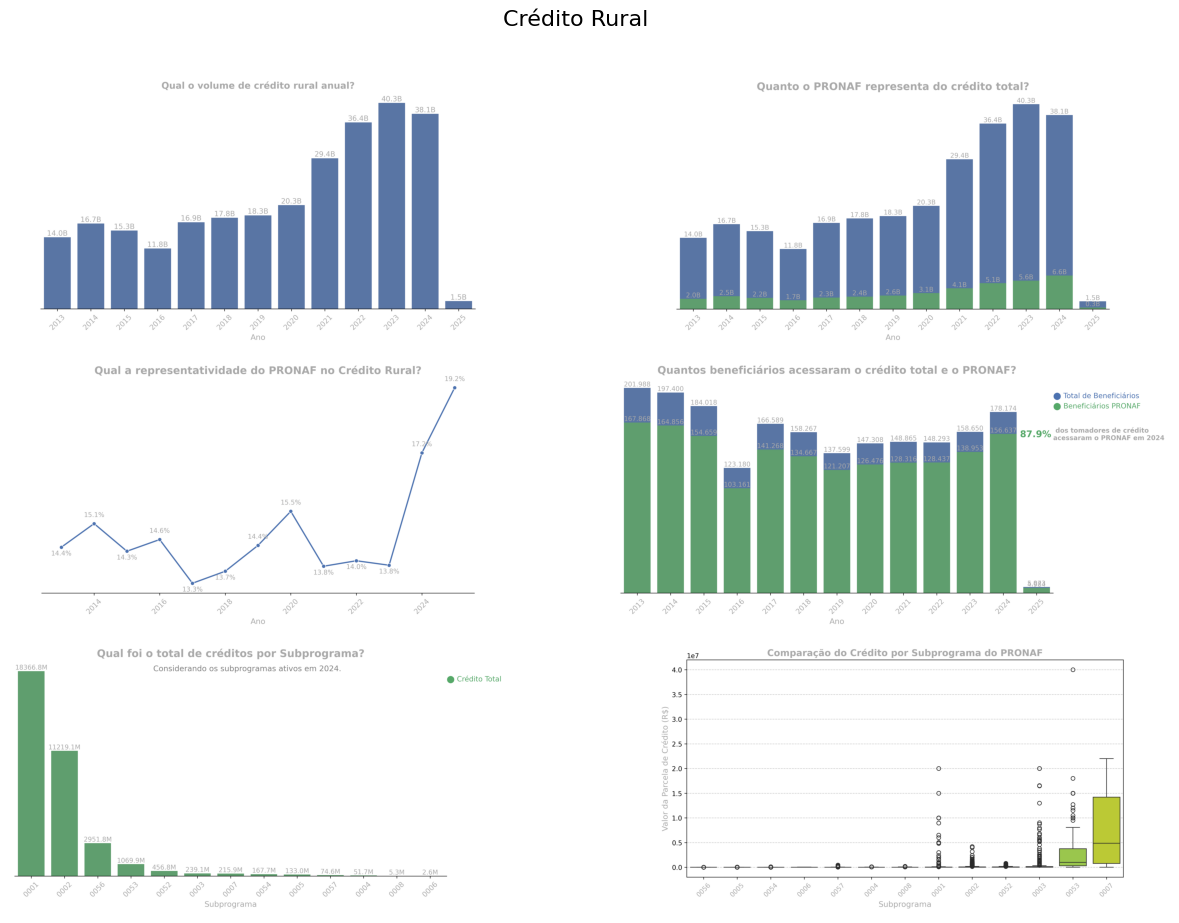

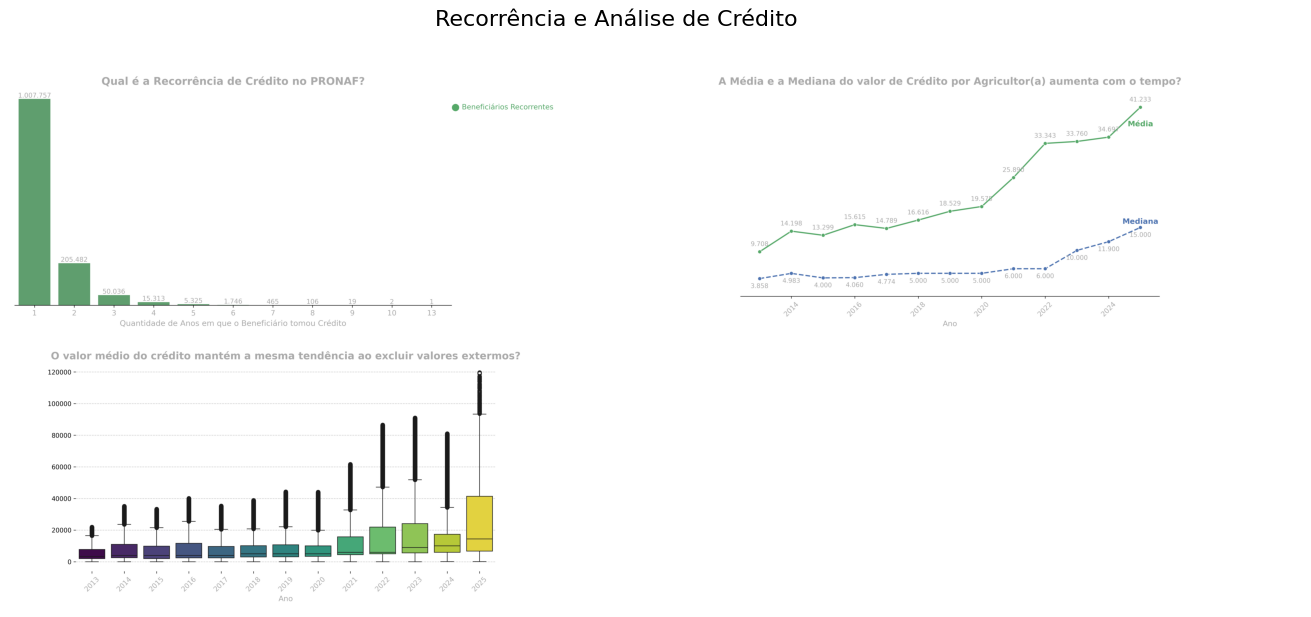

In [58]:
# Função para exibir as imagens de um capítulo com um título
def display_chapter(title, image_files, ncols=2, figsize=(14, 6)):
    n_images = len(image_files)
    nrows = (n_images + ncols - 1) // ncols  # Calcula o número de linhas necessário
    fig, axes = plt.subplots(nrows, ncols, figsize=(figsize[0], nrows * figsize[1] / ncols))
    fig.suptitle(title, fontsize=16, y=1.02)

    # Se houver apenas uma linha, force axes ser uma lista
    if nrows == 1:
        axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]
    else:
        axes = axes.flatten()

    # Exibe cada imagem em um eixo
    for ax, img_file in zip(axes, image_files):
        img = mpimg.imread(img_file)
        ax.imshow(img)
        ax.axis('off')  # Remove os eixos

    # Esconde os eixos extras (caso haja mais subplots que imagens)
    for ax in axes[len(image_files):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Listas com os arquivos de cada capítulo
capitulo2 = [
   f"{drive_folder}/fig_2_tratamento_vl_credito.png",
   f"{drive_folder}/fig_21_limpeza_dados.png"
]

capitulo3 = [
   f"{drive_folder}/fig_3_credito_rural.png",
   f"{drive_folder}/fig_31_credito_rural_pronaf.png",
   f"{drive_folder}/fig_32_credito_rural_pronaf_percentual.png",
   f"{drive_folder}/fig_33_qtde_beneficiarios.png",
   f"{drive_folder}/fig_34_creditos_subprograma.png",
   f"{drive_folder}/fig_35_creditos_subprograma_boxplot.png"
]

capitulo4 = [
   f"{drive_folder}/fig_4_recorrência.png",
   f"{drive_folder}/fig_41_media_mediana.png",
   f"{drive_folder}/fig_42_valor_credito_boxplot.png"
]

# Exibir cada capítulo com seu título
display_chapter("Tratamento e Limpeza de Dados", capitulo2, ncols=2)
display_chapter("Crédito Rural", capitulo3, ncols=2)
display_chapter("Recorrência e Análise de Crédito", capitulo4, ncols=2)


### Conclusões
O acesso ao crédito do PRONAF resultou em melhoria nas condições econômicas dos agricultores familiares ao longo de 10 anos?

Os resultados sugerem que o aumento da capacidade de endividamento d@s Agricultor@s Familiares, ao longo dos últimos 12 anos, tanto na média quanto na mediana, aponta para uma possível melhoria nas condições econômicas desse público. A recorrência na tomada de crédito e o crescimento gradual do valor médio das parcelas reforçam a hipótese de que o PRONAF tenha contribuído para alavancar o desenvolvimento dessas famílias agricultoras.

## Limitações

Para confirmar a existência de uma melhoria econômica real, recomenda-se deflacionar os valores ao longo dos anos, isolando o efeito da inflação.

Fatores externos (como preços de insumos, condições climáticas e políticas agrícolas) não foram considerados de forma aprofundada e podem ter impacto significativo nos resultados.

Indicadores adicionais, como evolução da renda bruta, produtividade, endividamento total e qualidade de vida, devem ser incluídos para uma avaliação mais precisa dos efeitos do PRONAF.

A análise se restringiu aos dados disponíveis; portanto, cruzar com outras fontes de informação ou aplicar métodos qualitativos (entrevistas, estudos de caso) pode oferecer uma visão mais ampla sobre a realidade dos Agricultor@s Familiares.

# 6. Avançando um pouco mais...

In [26]:
# Criar novo dataframe com dados do PRONAF (CD_PROGRAMA = '0001')
df_pronaf = df[df['CD_PROGRAMA'] == '0001']

# Filtrar por subprogramas que existiam em 2024
# Passo 1: Criar a lista de subprogramas que ocorreram em 2024
subprogramas_2024 = df_pronaf[df_pronaf['ANO'] == 2024]['CD_SUBPROGRAMA'].unique().tolist()

# Passo 2: Filtrar o dataframe completo para conter apenas esses subprogramas
df_pronaf_filtrado = df_pronaf[df_pronaf['CD_SUBPROGRAMA'].isin(subprogramas_2024)]

In [27]:
# Criar uma tabela que mostre a trajetória dos CPFs ao longo dos anos
df_movimentacao = df_pronaf_filtrado.pivot_table(index="CD_CPF_CNPJ", columns="ANO", values="CD_SUBPROGRAMA", aggfunc="first")

# Contar quantos CPFs migraram de subprograma a cada ano
df_movimentacao["Mudou"] = df_movimentacao.iloc[:, :-1].ne(df_movimentacao.iloc[:, 1:]).sum(axis=1)

# Criar um dataframe de transições entre subprogramas
df_transicao = df_pronaf_filtrado.groupby(["ANO", "CD_SUBPROGRAMA"])["CD_CPF_CNPJ"].count().reset_index()

# Criar um Sankey Diagram para visualização se houver mudanças significativas
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=df_transicao["CD_SUBPROGRAMA"].astype(str).unique().tolist()
    ),
    link=dict(
        source=df_transicao["CD_SUBPROGRAMA"].astype('category').cat.codes,  # Converter subprograma em índice
        target=df_transicao["CD_SUBPROGRAMA"].astype('category').cat.codes.shift(-1).fillna(0),  # Destino
        value=df_transicao["CD_CPF_CNPJ"]
    )
))

fig.update_layout(title_text="Existe uma Escada de Crescimento nos Subprogramas do PRONAF?", font_size=12)
fig.show()
